### LAPLACE EQUATION (2-dim)

### Given By:

$$
\large
\begin{aligned}
\Delta u = \nabla^{2} u = u_{xx} + u_{yy} = 0
\end{aligned}
$$

$
\begin{aligned}
&\text{Similarly to what we have done before, we use the 2nd order centered difference expansion for,} \; u_{xx}, u_{yy}, \\
&\text{so we have:} \\
&\frac{u_{j+1, k} - 2u_{j,k} + u_{j-1, k}}{(\Delta x)^{2}} + \frac{u_{j, k+1} - 2u_{j,k} + u_{j, k-1}}{(\Delta y)^{2}} = 0 \\
&\text{where j,k are indices of x,y} \\
&\text{we choose } \Delta x = \Delta y \;, \text{since mesh size will not heavily impact stability of our solution, so we can rewrite previous equation as:} \\
&u_{j,k} = \frac{1}{4}(u_{j,k+1} + u_{j, k-1} + u_{j+1, k} + u_{j-1, k})\\ \\
&\text{The idea is to use a grid to approximate an irregularly shaped domain.} \\ 
&\text{Where we input dirichlet boundaries conditions at each edge of the grid, and then we update the interior points using the previous update method.} \\
&\text{To optimize the rate of convergence, we use the Gauss-Seidel method defined as: } \\
&u^{n+1}_{j,k} = \frac{1}{4}(u^{n}_{j,k+1} + u^{n+1}_{j, k-1} + u^{n}_{j+1, k} + u^{n+1}_{j-1, k}) \\
&\text{where we compute } u^{n+1}_{j,k} \text{ one row at a time starting from bottom to top and iterating left to right.}
&\text{Where we store a copy of solution matrix from the previous iteration to help update our values. This method helps our convergence rate.}
\end{aligned}
$

In [1]:
from utils import *

In [2]:
def laplace_equation_solver(u, max_iterations=10000, tol=1e-5):
    '''
    Gaussian-Seidel Method
    u: solution matrix with boundaries already embedded
    max_iterations: number of iterations we want to perform
    tol: error bound
    '''
    
    K, J = u.shape
    for i in range(max_iterations):
        max_diff = 0
        u_old = u.copy()
        for k in range(K-2, 0, -1):
            for j in range(1, J-1):
                old_val = u[k,j]
                new_val = .25*(u_old[k, j+1] + u[k, j-1] + u[k+1, j] + u_old[k-1, j])
                u[k,j] = new_val

                max_diff = max(max_diff, abs(new_val - old_val))

        if max_diff <= tol:
            print(f'converged after {i+1} iterations')
            return u

    print(f'Did not converge after {max_iterations}')
    return u

In [3]:
x = np.linspace(0,1, 100)
y = x

u = np.zeros((len(y), len(x)))
#top boundary
u[0, :] = 0
#bottom boundary
u[-1, :] = np.sin(np.pi * x)
#left boundary
u[:, 0] = 0
#right boundary
u[:, -1] = 0

numerical_solution = laplace_equation_solver(u)

converged after 3421 iterations


In [4]:
X,Y = np.meshgrid(x, y)
def analytic_solution(x, y):
    return (np.sinh(np.pi*y)/np.sinh(np.pi))*np.sin(np.pi*x)

exact_solution = analytic_solution(X,Y)

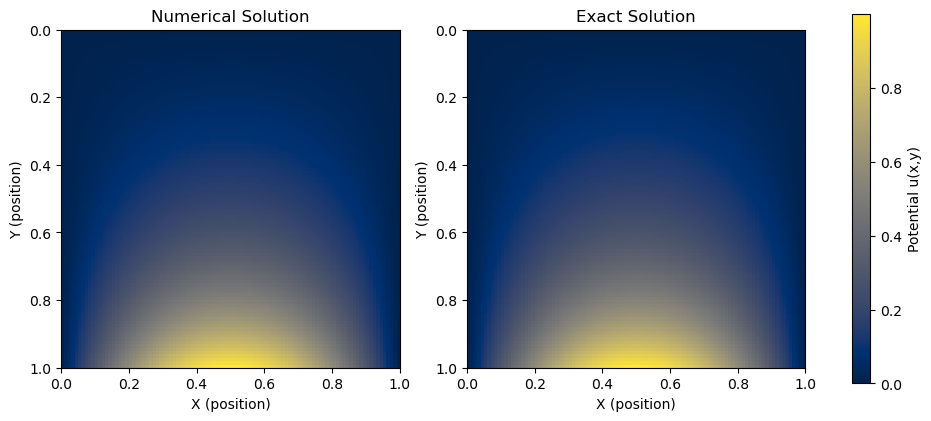

In [5]:
def laplace_plot(exact, numerical):
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    im0 = ax[0].imshow(numerical, origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()],
           cmap='cividis')
    
    ax[0].set_xlabel('X (position)')
    ax[0].set_ylabel('Y (position)')
    ax[0].set_title('Numerical Solution')
    ax[0].invert_yaxis()

    im1 = ax[1].imshow(exact, origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()],
           cmap='cividis')
    
    ax[1].set_xlabel('X (position)')
    ax[1].set_ylabel('Y (position)')
    ax[1].set_title('Exact Solution')
    ax[1].invert_yaxis()

    cbar = fig.colorbar(im1, ax=ax.ravel().tolist(), shrink=0.8)
    cbar.set_label("Potential u(x,y)")
    plt.show()
    return

laplace_plot(exact_solution, numerical_solution)

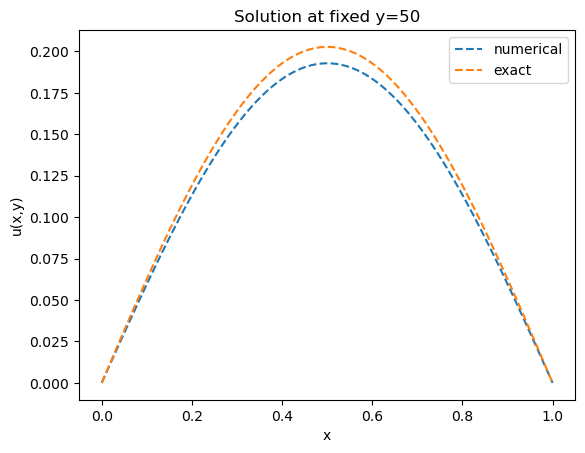

In [6]:
Ny, Nx = numerical_solution.shape
mid_row = Ny // 2
plt.plot(x, numerical_solution[mid_row, :], '--' ,label='numerical')
plt.plot(x, exact_solution[mid_row, :], '--' ,label='exact')
plt.xlabel('x')
plt.ylabel('u(x,y)')
plt.title(f'Solution at fixed y={mid_row}')
plt.legend()
plt.show()

Finite Difference Method is a strong numerical method to approximate PDEs by descretizing the domain into a grid and replacing derivatives by using finite differences. The idea is to break down the PDE into a solvable system of equations. This method is extremely effective in low dimensions, however, computation cost will be an issue in higher dimensions. 